Figure saved successfully as: Figure5_Qualitative_Analysis.pdf


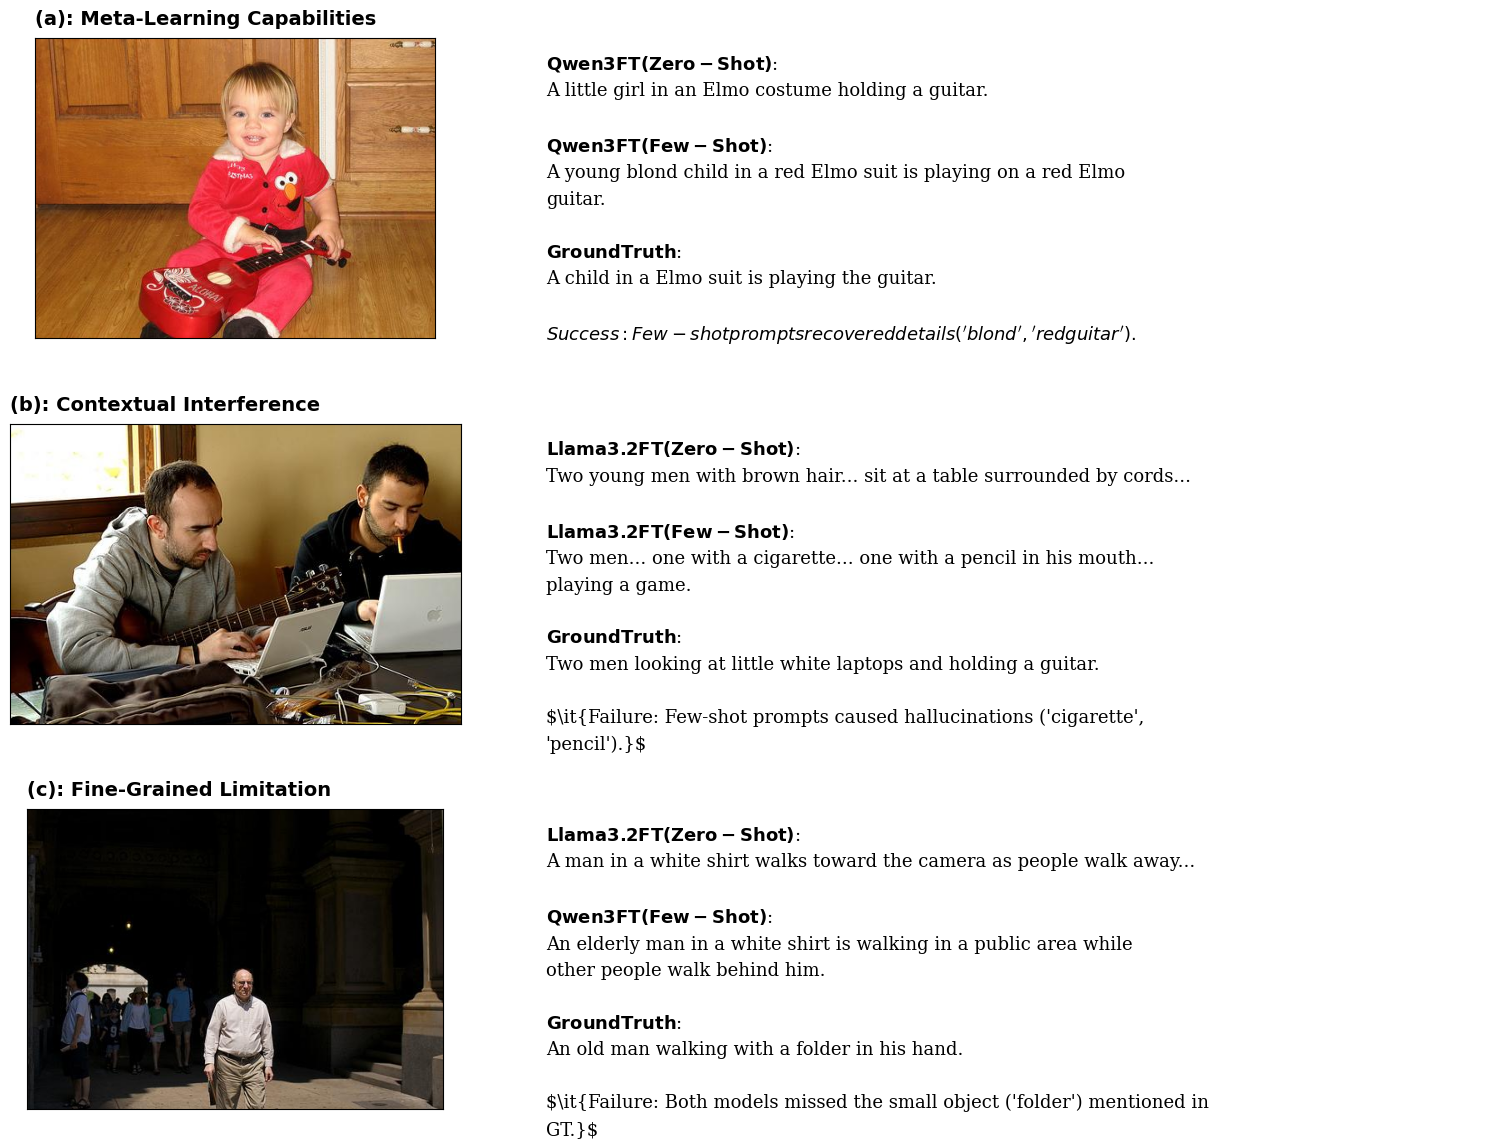

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnchoredText
import textwrap

# ==========================================
# CONFIGURATION
# ==========================================

# 1. Image Filenames (Make sure these exist in the folder)
img_files = [
    "/content/image-1.png",  # Row 1: Synergy (Elmo)
    "/content/image-2.png",  # Row 2: Interference (Two Men)
    "/content/image-3.png"   # Row 3: Failure (Old Man)
]

# 2. Captions Data
# Row 1: Qwen3 Synergy
row1_data = {
    "title": "(a): Meta-Learning Capabilities",
    "model_a_name": "Qwen3 FT (Zero-Shot)",
    "model_a_text": "A little girl in an Elmo costume holding a guitar.",
    "model_b_name": "Qwen3 FT (Few-Shot)",
    "model_b_text": "A young blond child in a red Elmo suit is playing on a red Elmo guitar.",
    "gt_text": "A child in a Elmo suit is playing the guitar.",
    "highlight": "Success: Few-shot prompts recovered details ('blond', 'red guitar')."
}

# Row 2: Llama 3.2 Interference
row2_data = {
    "title": "(b): Contextual Interference",
    "model_a_name": "Llama 3.2 FT (Zero-Shot)",
    "model_a_text": "Two young men with brown hair... sit at a table surrounded by cords...",
    "model_b_name": "Llama 3.2 FT (Few-Shot)",
    "model_b_text": "Two men... one with a cigarette... one with a pencil in his mouth... playing a game.",
    "gt_text": "Two men looking at little white laptops and holding a guitar.",
    "highlight": "Failure: Few-shot prompts caused hallucinations ('cigarette', 'pencil')."
}

# Row 3: Fidelity Limitation
row3_data = {
    "title": "(c): Fine-Grained Limitation",
    "model_a_name": "Llama 3.2 FT (Zero-Shot)",
    "model_a_text": "A man in a white shirt walks toward the camera as people walk away...",
    "model_b_name": "Qwen3 FT (Few-Shot)",
    "model_b_text": "An elderly man in a white shirt is walking in a public area while other people walk behind him.",
    "gt_text": "An old man walking with a folder in his hand.",
    "highlight": "Failure: Both models missed the small object ('folder') mentioned in GT."
}

data_list = [row1_data, row2_data, row3_data]

# ==========================================
# PLOTTING FUNCTION
# ==========================================

def create_figure():
    # Create a figure with 3 rows and 2 columns (Image | Text)
    fig, axes = plt.subplots(3, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [1, 1.5]})
    plt.subplots_adjust(hspace=0.3, wspace=0.1)

    for i in range(3):
        # --- LEFT COLUMN: IMAGE ---
        ax_img = axes[i, 0]
        try:
            img = mpimg.imread(img_files[i])
            ax_img.imshow(img)
        except FileNotFoundError:
            # Placeholder if image is missing
            ax_img.text(0.5, 0.5, f"Image not found:\n{img_files[i]}",
                        ha='center', va='center', fontsize=12, color='red')
            ax_img.set_facecolor('#f0f0f0')

        ax_img.set_xticks([])
        ax_img.set_yticks([])
        ax_img.set_title(data_list[i]["title"], fontsize=14, fontweight='bold', loc='left', pad=10)

        # --- RIGHT COLUMN: TEXT ---
        ax_txt = axes[i, 1]
        ax_txt.axis('off')

        d = data_list[i]

        # Helper to wrap text
        def wrap(text, width=70):
            return "\n".join(textwrap.wrap(text, width=width))

        # Construct the text block
        text_content = (
            f"$\\bf{{ {d['model_a_name']} }}$:\n{wrap(d['model_a_text'])}\n\n"
            f"$\\bf{{ {d['model_b_name']} }}$:\n{wrap(d['model_b_text'])}\n\n"
            f"$\\bf{{Ground Truth}}$:\n{wrap(d['gt_text'])}\n\n"
            f"$\\it{{{wrap(d['highlight'])}}}$"
        )

        # Add text to the subplot
        ax_txt.text(0.02, 0.95, text_content,
                    fontsize=13,
                    va='top',
                    family='serif',
                    linespacing=1.6)

    # Save and Show
    plt.tight_layout()
    save_path = "Figure5_Qualitative_Analysis.pdf" # PDF is best for LaTeX
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Figure saved successfully as: {save_path}")
    plt.show()

if __name__ == "__main__":
    create_figure()

In [ ]:
import os

In [ ]:
try:
    from unsloth import FastVisionModel
except ImportError:
    os.system("pip install --no-deps unsloth bitsandbytes accelerate xformers==0.0.29.post3 peft trl==0.15.2 triton cut_cross_entropy unsloth_zoo")
    os.system("pip install sentencepiece protobuf datasets huggingface_hub hf_transfer transformers[qwen]")
    from unsloth import FastVisionModel

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


/tmp/ipython-input-3504601553.py:6: UserWarning: WARNING: Unsloth should be imported before [transformers, peft] to ensure all optimizations are applied. Your code may run slower or encounter memory issues without these optimizations.

Please restructure your imports with 'import unsloth' at the top of your file.
  from unsloth import FastVisionModel


🦥 Unsloth Zoo will now patch everything to make training faster!
Unsloth: Could not import trl.trainer.alignprop_trainer: Failed to import trl.trainer.alignprop_trainer because of the following error (look up to see its traceback):
Failed to import trl.models.modeling_sd_base because of the following error (look up to see its traceback):
Failed to import diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion because of the following error (look up to see its traceback):
Failed to import diffusers.loaders.ip_adapter because of the following error (look up to see its traceback):
JITCallable._set_src() takes 1 positional argument but 2 were given
Unsloth: Could not import trl.trainer.ddpo_trainer: Failed to import trl.trainer.ddpo_trainer because of the following error (look up to see its traceback):
Failed to import trl.models.modeling_sd_base because of the following error (look up to see its traceback):
Failed to import diffusers.pipelines.stable_diffusion.pipeline_stable_diffu

In [ ]:
# 1. INSTALLATION & IMPORTS
# ==========================================
import torch
import random
import pandas as pd
from tqdm import tqdm
from PIL import Image
from datasets import load_dataset, Dataset, Features, Sequence, Value, Image as HFImage
from peft import PeftModel
from unsloth import FastVisionModel
from huggingface_hub import login

In [ ]:
# 2. LOAD MODEL & ADAPTERS
print("Loading Model...")
# Load Base Model
model, tokenizer = FastVisionModel.from_pretrained(
    "unsloth/Qwen3-VL-8B-Instruct-unsloth-bnb-4bit",
    load_in_4bit=True,
    use_gradient_checkpointing="unsloth",
)

# Load Your Fine-Tuned Adapters
model = PeftModel.from_pretrained(
    model,
    "Adyakanta/qwen3_finetuned_adapters_1"
)
FastVisionModel.for_inference(model)

Loading Model...
==((====))==  Unsloth 2025.11.4: Fast Qwen3_Vl patching. Transformers: 4.57.2.
   \\   /|    NVIDIA L4. Num GPUs = 1. Max memory: 22.161 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.0+cu126. CUDA: 8.9. CUDA Toolkit: 12.6. Triton: 3.5.0
\        /    Bfloat16 = TRUE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.72G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/213 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

video_preprocessor_config.json:   0%|          | 0.00/817 [00:00<?, ?B/s]

adapter_config.json: 0.00B [00:00, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/205M [00:00<?, ?B/s]

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): Qwen3VLForConditionalGeneration(
      (model): Qwen3VLModel(
        (visual): Qwen3VLVisionModel(
          (patch_embed): Qwen3VLVisionPatchEmbed(
            (proj): Conv3d(3, 1152, kernel_size=(2, 16, 16), stride=(2, 16, 16))
          )
          (pos_embed): Embedding(2304, 1152)
          (rotary_pos_emb): Qwen3VLVisionRotaryEmbedding()
          (blocks): ModuleList(
            (0-26): 27 x Qwen3VLVisionBlock(
              (norm1): LayerNorm((1152,), eps=1e-06, elementwise_affine=True)
              (norm2): LayerNorm((1152,), eps=1e-06, elementwise_affine=True)
              (attn): Qwen3VLVisionAttention(
                (qkv): lora.Linear(
                  (base_layer): Linear(in_features=1152, out_features=3456, bias=True)
                  (lora_dropout): ModuleDict(
                    (default): Identity()
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_

In [ ]:
# 3. LOAD DATASETS (SEPARATE SUPPORT & QUERY)
# ==========================================
print("Loading Datasets...")

# A. SUPPORT SET (Training Data)
# We will pick few-shot examples from HERE.
# This ensures no test data leakage.
print("Loading Training Data (Support Set)...")
support_dataset = load_dataset("Adyakanta/train_flickr30k", split="test")

# B. QUERY SET (Test Data)
# We will generate captions for THESE images.
print("Loading Test Data (Query Set)...")
query_dataset = load_dataset("Adyakanta/test_flickr30k", split="test")

# Optional: Clean up columns if necessary
support_dataset = support_dataset.remove_columns(['sentids', 'split', 'img_id', 'filename'])
query_dataset = query_dataset.remove_columns(['sentids', 'split', 'img_id', 'filename'])

Loading Datasets...
Loading Training Data (Support Set)...


README.md:   0%|          | 0.00/471 [00:00<?, ?B/s]

data/test-00000-of-00006.parquet:   0%|          | 0.00/482M [00:00<?, ?B/s]

data/test-00001-of-00006.parquet:   0%|          | 0.00/483M [00:00<?, ?B/s]

data/test-00002-of-00006.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

data/test-00003-of-00006.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

data/test-00004-of-00006.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

data/test-00005-of-00006.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/21000 [00:00<?, ? examples/s]

Loading Test Data (Query Set)...


README.md:   0%|          | 0.00/469 [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/14.6M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
# 4. FEW-SHOT INFERENCE FUNCTION
def get_few_shot_prediction(target_image, support_dataset, model, tokenizer, num_shots=3, num_return_sequences=5):
    """
    Uses random examples from 'support_dataset' (Training) to prompt for 'target_image' (Test).
    Generates 'num_return_sequences' diverse captions.
    """

    # --- Step A: Select Shots from SUPPORT Dataset ---
    # We pick random indices from the training data
    # Since support and query are different datasets, we don't need to exclude the target index.
    possible_indices = list(range(len(support_dataset)))
    shot_indices = random.sample(possible_indices, num_shots)

    messages = []
    images_list = []
    instruction = "Write a descriptive caption for this image."

    # --- Step B: Build Context (From Training Data) ---
    for idx in shot_indices:
        sample = support_dataset[idx]
        images_list.append(sample["image"])

        # User Turn: Image + Instruction
        messages.append({
            "role": "user",
            "content": [
                {"type": "image"},
                {"type": "text", "text": instruction}
            ]
        })

        # Assistant Turn: Gold Caption from Training Data
        # Handle if caption is list or string
        caption_text = sample["caption"][0] if isinstance(sample["caption"], list) else sample["caption"]
        messages.append({
            "role": "assistant",
            "content": [{"type": "text", "text": caption_text}]
        })

    # --- Step C: Add Target (From Test Data) ---
    # We add the target image (passed as argument) to the list
    images_list.append(target_image)

    messages.append({
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": instruction}
        ]
    })

    # --- Step D: Tokenize ---
    input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)

    inputs = tokenizer(
        images=images_list,
        text=[input_text],
        padding=True,
        return_tensors="pt"
    ).to("cuda")

    # --- Step E: Diversity Generation Loop ---
    generated_captions = []

    # We loop explicitly to force the model to re-sample and create diverse outputs
    for _ in range(num_return_sequences):
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=128,
                use_cache=True,

                # Sampling parameters for diversity
                do_sample=True,
                temperature=0.8,
                top_p=0.9,
                top_k=50,
                min_p=0.0,

                num_return_sequences=1 # Generate one at a time per loop iteration
            )

        # Decode only the new tokens
        generated_ids = outputs[0][len(inputs.input_ids[0]):]
        response = tokenizer.decode(generated_ids, skip_special_tokens=True)
        generated_captions.append(response)

    return generated_captions

In [ ]:
# 5. RUN INFERENCE
# ==========================================
print("\nStarting Rigorous Few-Shot Inference...\n")
results = []

# Iterate through the TEST dataset (Query Set)
# Use min(100, len) just for testing, remove min() for full run
num_samples = min(100, len(query_dataset))

for i in tqdm(range(num_samples)):
    try:
        # Get the target image and its ground truth from the TEST set
        target_img = query_dataset[i]["image"]
        target_cap = query_dataset[i]["caption"]

        # Generate predictions
        # Crucially: We pass 'support_dataset' (Training Data) for the few-shot examples
        generated_captions_list = get_few_shot_prediction(
            target_image=target_img,
            support_dataset=support_dataset,
            model=model,
            tokenizer=tokenizer,
            num_shots=3,
            num_return_sequences=5
        )

        results.append({
            "image": target_img,
            "original_response": target_cap,
            "generated_response": generated_captions_list
        })

        # Sanity check print for the first image
        if i == 0:
            print(f"\n--- Check Diversity for Test Image {i} ---")
            for idx, cap in enumerate(generated_captions_list):
                print(f"{idx+1}: {cap}")

    except Exception as e:
        print(f"Error at index {i}: {e}")
        continue


Starting Rigorous Few-Shot Inference...



  1%|          | 1/100 [01:20<2:12:42, 80.42s/it]


--- Check Diversity for Test Image 0 ---
1: A toddler wearing an Elmo costume plays a red ukulele.
2: A little blond girl in a red Elmo costume playing with a red guitar.
3: A blond child dressed in an Elmo costume playing an Elmo guitar.
4: A blond child in a red Elmo suit plays a red guitar.
5: A young blond child in a red Elmo suit is playing on a red Elmo guitar.


100%|██████████| 100/100 [33:36<00:00, 20.17s/it]


In [ ]:
# 6. SAVE AND UPLOAD
# ==========================================
# Authenticate
# login() # Uncomment if you need to login interactively
from huggingface_hub import login
login()


print("Creating Hugging Face Dataset...")
df_few_shot = pd.DataFrame(results)

# --- DATA PROCESSING ---
images_list = df_few_shot['image'].tolist()

# Ensure Original Responses are lists
original_responses = []
for item in df_few_shot['original_response'].tolist():
    if isinstance(item, list):
        original_responses.append(item)
    else:
        original_responses.append([item])

# Ensure Generated Responses are lists
generated_responses = []
for item in df_few_shot['generated_response'].tolist():
    if isinstance(item, list):
        generated_responses.append(item)
    else:
        generated_responses.append([item])

# --- DEFINE FEATURES ---
features = Features({
    'image': HFImage(),
    'original_response': Sequence(Value('string')),
    'generated_response': Sequence(Value('string')),
})

# Create Dataset
ds_few_shot = Dataset.from_dict({
    'image': images_list,
    'original_response': original_responses,
    'generated_response': generated_responses,
}, features=features)

# Push
repo_id = "Adyakanta/Qwen3_FT_test_caption_few_shot_Sampled"
print(f"Pushing to {repo_id}...")
ds_few_shot.push_to_hub(repo_id)
print("✅ Upload Complete!")

Creating Hugging Face Dataset...
Pushing to Adyakanta/Qwen3_FT_test_caption_few_shot_Sampled...


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

                              :  98%|#########7| 4.09MB / 4.17MB            

✅ Upload Complete!


# **Conversion of A List of Strings to List of Lists**

In [12]:
import pandas as pd
import numpy as np
import ast
import nltk
from datasets import load_dataset
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction


try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

In [13]:
# 7. RELOAD AND REFORMAT DATA (FIXED)
# ==========================================
from datasets import load_dataset
import pandas as pd
import numpy as np

print("Loading dataset from Hugging Face...")
dataset_reloaded = load_dataset("Adyakanta/Qwen3_FT_test_caption_few_shot_Sampled", split="train")
df_results = dataset_reloaded.to_pandas()

# Robust function to handle Lists OR Numpy Arrays
def format_as_list_of_lists(caption_data):
    # If it's a numpy array, convert to list first
    if isinstance(caption_data, np.ndarray):
        caption_data = caption_data.tolist()

    # Now process if it is a list
    if isinstance(caption_data, list):
        return [[str(cap)] for cap in caption_data]

    return []

print("Reformatting columns...")
# Apply the transformation
df_results['original_response_formatted'] = df_results['original_response'].apply(format_as_list_of_lists)
df_results['generated_response_formatted'] = df_results['generated_response'].apply(format_as_list_of_lists)

# Check the results
print("\n--- Sample Transformation (Image 0) ---")
print("Original (Before):")
print(df_results['original_response'][0])

print("\nFormatted (After):")
print(df_results['original_response_formatted'][0])

print("\nGenerated (After):")
print(df_results['generated_response_formatted'][0])

Loading dataset from Hugging Face...
Reformatting columns...

--- Sample Transformation (Image 0) ---
Original (Before):
['The baby his a Cookie Monster outfit on he is happy he his a Gutter its red'
 "A child wearing a shirt decorated with Elmo's face holds a red ukulele."
 'A toddler wearing an Elmo Christmas outfit holds a red guitar.'
 'A child wearing a santa elmo suit holding a red guitar.'
 'A child in a Elmo suit is playing the guitar.']

Formatted (After):
[['The baby his a Cookie Monster outfit on he is happy he his a Gutter its red'], ["A child wearing a shirt decorated with Elmo's face holds a red ukulele."], ['A toddler wearing an Elmo Christmas outfit holds a red guitar.'], ['A child wearing a santa elmo suit holding a red guitar.'], ['A child in a Elmo suit is playing the guitar.']]

Generated (After):
[['A toddler wearing an Elmo costume plays a red ukulele.'], ['A little blond girl in a red Elmo costume playing with a red guitar.'], ['A blond child dressed in an Elmo c

In [14]:
df_results.drop(columns=['original_response'], inplace=True)
df_results.drop(columns=['generated_response'], inplace=True)

In [15]:
from datasets import load_dataset



# 2. Access the image
# Most image datasets have a column named 'img', 'image', or 'file'
# Let's assume the column name is 'img' and we want the first sample
sample =dataset_reloaded[42]
image = sample['image']  # This is usually a PIL Image object

# 3. View the image (optional)
image.show()

# 4. Save the image to your computer
image.save("downloaded_image.png")

print("Image successfully downloaded and saved as 'downloaded_image.png'")

Image successfully downloaded and saved as 'downloaded_image.png'


In [16]:
df_results

,image,original_response_formatted,generated_response_formatted
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,[[The baby his a Cookie Monster outfit on he i...,[[A toddler wearing an Elmo costume plays a re...
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,[[A man without a shirt runs through water spr...,[[A man with no shirt on is running in the fou...
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"[[A young woman in a blue shirt stands, holdin...",[[A little girl in a blue dress is chasing bub...
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,[[A woman is walking down a trail with tall gr...,[[A woman is running on a dirt path near the m...
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,[[A large black gorilla peers down at a group ...,"[[A group of people are at a gorilla exhibit, ..."
...,...,...,...
95,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"[[Three men in yellow hard hats, two women, an...",[[A small boy wearing an orange construction h...
96,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,[[A blond girl is sitting drinking a soda and ...,[[A little girl is sitting on a bench by an aq...
97,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,[[The Oklahoma football player watches the gam...,[[Oklahoma football player listening to someon...
98,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,[[A boy in a striped shirt with his arm stretc...,[[A little boy in a striped shirt is playing w...


In [17]:
df_results['generated_response_formatted'][42]

[['An elderly man in a white shirt is walking in a public area while other people walk behind him.'],
 ['A man in a white shirt and khaki pants is walking in the shade of a building.'],
 ['A man in a white shirt and khaki pants is walking through a tunnel with people around him.'],
 ['A man in a white shirt and tan pants walks down the stairs. People are in the background.'],
 ['A group of people walking down a street, a man in a white shirt is in the foreground.']]

In [18]:
import io
from PIL import Image

def convert_image_bytes_to_pil(image_entry):
    """
    Converts an image entry (dictionary with 'bytes' key) to a PIL Image object.
    """
    if isinstance(image_entry, dict) and 'bytes' in image_entry:
        image_bytes = image_entry['bytes']
        return Image.open(io.BytesIO(image_bytes))
    return None # Or raise an error if non-dict entries are unexpected

print("Converting 'image' column to PIL Image objects...")
df_results['image'] = df_results['image'].apply(convert_image_bytes_to_pil)
print("Conversion complete. Displaying first few rows with updated 'image' column:")
print(df_results.head())

Converting 'image' column to PIL Image objects...
Conversion complete. Displaying first few rows with updated 'image' column:
                                               image  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...   

                         original_response_formatted  \
0  [[The baby his a Cookie Monster outfit on he i...   
1  [[A man without a shirt runs through water spr...   
2  [[A young woman in a blue shirt stands, holdin...   
3  [[A woman is walking down a trail with tall gr...   
4  [[A large black gorilla peers down at a group ...   

                        generated_response_formatted  
0  [[A toddler wearing an Elmo costume plays a re...  
1  [[A man with no shirt on is running in the fou...  
2  [[A little girl in a blue dress 

In [19]:
df_results

,image,original_response_formatted,generated_response_formatted
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[[The baby his a Cookie Monster outfit on he i...,[[A toddler wearing an Elmo costume plays a re...
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[[A man without a shirt runs through water spr...,[[A man with no shirt on is running in the fou...
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[A young woman in a blue shirt stands, holdin...",[[A little girl in a blue dress is chasing bub...
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[[A woman is walking down a trail with tall gr...,[[A woman is running on a dirt path near the m...
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[[A large black gorilla peers down at a group ...,"[[A group of people are at a gorilla exhibit, ..."
...,...,...,...
95,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[Three men in yellow hard hats, two women, an...",[[A small boy wearing an orange construction h...
96,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[[A blond girl is sitting drinking a soda and ...,[[A little girl is sitting on a bench by an aq...
97,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[[The Oklahoma football player watches the gam...,[[Oklahoma football player listening to someon...
98,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[[A boy in a striped shirt with his arm stretc...,[[A little boy in a striped shirt is playing w...


In [20]:
output_csv_file = 'qwen3_FT_few_shot_sampled.csv'
df_results.to_csv(output_csv_file, index=False)
print(f"DataFrame saved to '{output_csv_file}' successfully.")

DataFrame saved to 'qwen3_FT_few_shot_sampled.csv' successfully.


# **Evaluation Metrics**

# **BLEU-1 AND BLEU-2**

In [ ]:
# # ==========================================
# # 8. CALCULATE BLEU-1 SCORES
# # ==========================================
# import nltk
# from nltk.translate.bleu_score import sentence_bleu
# import numpy as np

# # Ensure necessary NLTK data is downloaded (for tokenization)
# try:
#     nltk.data.find('tokenizers/punkt')
# except LookupError:
#     nltk.download('punkt')

# try:
#     nltk.data.find('tokenizers/punkt_tab')
# except LookupError:
#     # The error indicates that 'punkt_tab' is also required
#     nltk.download('punkt_tab')

# def calculate_avg_bleu1(row):
#     """
#     Calculates the average BLEU-1 score for a set of generated captions
#     against a set of reference captions.
#     """
#     # 1. Extract strings from your list-of-lists format [['cap'], ['cap']] -> ['cap', 'cap']
#     refs_text = [item[0] for item in row['original_response_formatted']]
#     hyps_text = [item[0] for item in row['generated_response_formatted']]

#     # 2. Tokenize References (Ground Truth)
#     # Format: list of lists of tokens [[w1, w2], [w1, w3]]
#     ref_tokens = [nltk.word_tokenize(r.lower()) for r in refs_text]

#     scores = []

#     # 3. Evaluate each Generated Caption
#     for hyp in hyps_text:
#         hyp_token = nltk.word_tokenize(hyp.lower())

#         # Calculate BLEU-1 (Weights: 1.0 for 1-grams)
#         # Smoothing is often useful, but for pure BLEU-1 on full sentences, standard is fine.
#         score = sentence_bleu(ref_tokens, hyp_token, weights=(1.0, 0, 0, 0))
#         scores.append(score)

#     # 4. Return the average score for this image
#     return np.mean(scores) if scores else 0.0

# print("Calculating BLEU-1 Scores...")

# # Apply the function to every row
# df_results['bleu_1'] = df_results.apply(calculate_avg_bleu1, axis=1)

# # Calculate dataset average
# average_bleu1 = df_results['bleu_1'].mean()

# print(f"\n===============================")
# print(f"Average BLEU-1 Score: {average_bleu1:.4f}")
# print(f"===============================")

# # Show a sample with score
# print("\n--- Sample Result ---")
# print(f"Generated: {df_results['generated_response_formatted'][0]}")
# print(f"BLEU-1:    {df_results['bleu_1'][0]:.4f}")

Calculating BLEU-1 Scores...


/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_


Average BLEU-1 Score: 0.6710

--- Sample Result ---
Generated: [['A toddler wearing an Elmo costume plays a red ukulele.'], ['A little blond girl in a red Elmo costume playing with a red guitar.'], ['A blond child dressed in an Elmo costume playing an Elmo guitar.'], ['A blond child in a red Elmo suit plays a red guitar.'], ['A young blond child in a red Elmo suit is playing on a red Elmo guitar.']]
BLEU-1:    0.7268


In [ ]:
# ==========================================
# 8. STATISTICAL ANALYSIS (MAX BLEU - BEST OF 5)
# ==========================================
import numpy as np
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Use the same smoothing as before for consistency
chencherry = SmoothingFunction()

def calculate_image_max_bleu_scores(original_formatted, generated_formatted):
    """
    Calculates the MAX BLEU-1 and BLEU-2 score for a single image.
    It checks all 5 generated captions and picks the BEST one.
    """
    # 1. Flatten lists
    refs = [item[0] for item in original_formatted]
    hyps = [item[0] for item in generated_formatted]

    # 2. Tokenize
    ref_tokens = [r.lower().split() for r in refs]
    hyp_tokens_list = [h.lower().split() for h in hyps]

    b1_scores = []
    b2_scores = []

    # 3. Evaluate each generated caption against ALL references
    for hyp_tokens in hyp_tokens_list:
        # Calculate score for this specific candidate
        b1 = sentence_bleu(ref_tokens, hyp_tokens, weights=(1, 0, 0, 0), smoothing_function=chencherry.method1)
        b2 = sentence_bleu(ref_tokens, hyp_tokens, weights=(0.5, 0.5, 0, 0), smoothing_function=chencherry.method1)

        b1_scores.append(b1)
        b2_scores.append(b2)

    # 4. Return the MAX score (Best of N) instead of Mean
    # This matches your Zero-Shot logic
    return np.max(b1_scores), np.max(b2_scores)

print("Calculating MAX BLEU scores for Few-Shot...")

# Apply calculation
bleu_results = [
    calculate_image_max_bleu_scores(orig, gen)
    for orig, gen in zip(df_results['original_response_formatted'], df_results['generated_response_formatted'])
]

bleu1_all, bleu2_all = zip(*bleu_results)

df_results['BLEU_1_Max'] = bleu1_all
df_results['BLEU_2_Max'] = bleu2_all

# --- DISPLAY REPORT ---
print("\n" + "="*40)
print("   FEW-SHOT RESULTS (MAX METRIC)")
print("="*40)

print(f"Mean Max BLEU-1: {df_results['BLEU_1_Max'].mean():.4f}")
print(f"Mean Max BLEU-2: {df_results['BLEU_2_Max'].mean():.4f}")

print("\nDetailed Stats:")
print(df_results[['BLEU_1_Max', 'BLEU_2_Max']].describe())

Calculating MAX BLEU scores for Few-Shot...

   FEW-SHOT RESULTS (MAX METRIC)
Mean Max BLEU-1: 0.7563
Mean Max BLEU-2: 0.5846

Detailed Stats:
       BLEU_1_Max  BLEU_2_Max
count  100.000000  100.000000
mean     0.756297    0.584633
std      0.129695    0.153954
min      0.400000    0.239046
25%      0.666667    0.488953
50%      0.767967    0.577350
75%      0.855336    0.686100
max      1.000000    0.957427


In [ ]:
##MEAN OF 5 #########
# ==========================================


# import pandas as pd
# import numpy as np
# from nltk.translate.bleu_score import sentence_bleu
# from nltk.tokenize import word_tokenize
# import nltk
# import warnings

# # Ensure nltk resources are available (same as your code)
# try:
#     nltk.data.find('tokenizers/punkt')
# except LookupError:
#     nltk.download('punkt')
#     nltk.download('punkt_tab')

# warnings.filterwarnings('ignore')

# # --- 1. DEFINE YOUR SPECIFIC SCORING FUNCTIONS ---
# def calculate_bleu_scores(candidate, reference):
#     candidate_tokens = word_tokenize(candidate.lower())
#     reference_tokens = word_tokenize(reference.lower())
#     try:
#         # BLEU-1
#         bleu1 = sentence_bleu([reference_tokens], candidate_tokens, weights=(1, 0, 0, 0))
#         # BLEU-2
#         bleu2 = sentence_bleu([reference_tokens], candidate_tokens, weights=(0.5, 0.5, 0, 0))
#         return bleu1, bleu2
#     except:
#         return 0.0, 0.0

# def extract_sentences(nested_list):
#     sentences = []
#     for item in nested_list:
#         if isinstance(item, list):
#             sentences.extend(extract_sentences(item))
#         elif isinstance(item, str):
#             sentences.append(item)
#     return sentences

# def calculate_max_bleu_for_row(generated_responses, original_responses):
#     # Extract sentences using your logic
#     gen_sentences = extract_sentences(generated_responses)
#     orig_sentences = extract_sentences(original_responses)

#     bleu1_scores = []
#     bleu2_scores = []

#     # Compare EVERY generated caption against EVERY original caption
#     for gen in gen_sentences:
#         for orig in orig_sentences:
#             bleu1, bleu2 = calculate_bleu_scores(gen, orig)
#             bleu1_scores.append(bleu1)
#             bleu2_scores.append(bleu2)

#     # Take the MAX (Optimistic Score)
#     max_bleu1 = max(bleu1_scores) if bleu1_scores else 0.0
#     max_bleu2 = max(bleu2_scores) if bleu2_scores else 0.0

#     return max_bleu1, max_bleu2

# # --- 2. APPLY TO YOUR FEW-SHOT DATAFRAME ---
# # Assuming 'df_results' is the dataframe from the previous step
# # containing 'original_response_formatted' and 'generated_response_formatted'

# print("Calculating MAX BLEU scores for Few-Shot results...")

# max_b1_list = []
# max_b2_list = []

# for index, row in df_results.iterrows():
#     # We use the formatted columns we created in Step 7
#     # These are already lists of lists: [['cap1'], ['cap2']...]
#     gen = row['generated_response_formatted']
#     orig = row['original_response_formatted']

#     b1, b2 = calculate_max_bleu_for_row(gen, orig)
#     max_b1_list.append(b1)
#     max_b2_list.append(b2)

# # Add to dataframe
# df_results['max_bleu1_score'] = max_b1_list
# df_results['max_bleu2_score'] = max_b2_list

# # --- 3. PRINT STATISTICS (APPLES-TO-APPLES) ---
# print("\n" + "="*40)
# print("   FEW-SHOT RESULTS (MAX SCORE METHOD)")
# print("="*40)

# print(f"Mean Max BLEU-1: {df_results['max_bleu1_score'].mean():.4f}  (vs Zero-Shot: 0.5918)")
# print(f"Mean Max BLEU-2: {df_results['max_bleu2_score'].mean():.4f}  (vs Zero-Shot: 0.4442)")

# # Additional Stats
# print("\nDetailed Statistics:")
# print(df_results[['max_bleu1_score', 'max_bleu2_score']].describe())

# # Save for your paper
# df_results.to_csv('qwen_few_shot_max_scores.csv', index=False)
# print("\nSaved to 'qwen_few_shot_max_scores.csv'")

# **BLEU-3 AND BLEU-4**

In [ ]:
# ==========================================
# 10. CALCULATE MAX BLEU-3 & BLEU-4
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Smoothing method 1 (Standard for NLTK)
chencherry = SmoothingFunction()

def calculate_higher_order_bleu(original_formatted, generated_formatted):
    """
    Calculates the MAX BLEU-3 and BLEU-4 for a single image.
    """
    refs = [item[0] for item in original_formatted]
    hyps = [item[0] for item in generated_formatted]

    ref_tokens = [r.lower().split() for r in refs]
    hyp_tokens_list = [h.lower().split() for h in hyps]

    b3_scores = []
    b4_scores = []

    for hyp_tokens in hyp_tokens_list:
        # BLEU-3 (Weights: 1/3, 1/3, 1/3)
        b3 = sentence_bleu(ref_tokens, hyp_tokens, weights=(0.333, 0.333, 0.333, 0), smoothing_function=chencherry.method1)

        # BLEU-4 (Weights: 1/4, 1/4, 1/4, 1/4)
        b4 = sentence_bleu(ref_tokens, hyp_tokens, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=chencherry.method1)

        b3_scores.append(b3)
        b4_scores.append(b4)

    # Return MAX scores (Best-of-N)
    return np.max(b3_scores), np.max(b4_scores)

print("Calculating BLEU-3 and BLEU-4...")

# Run calculation
higher_bleu_results = [
    calculate_higher_order_bleu(orig, gen)
    for orig, gen in zip(df_results['original_response_formatted'], df_results['generated_response_formatted'])
]

b3_all, b4_all = zip(*higher_bleu_results)

df_results['BLEU_3_Max'] = b3_all
df_results['BLEU_4_Max'] = b4_all

# --- PRINT STATS ---
print("\n" + "="*40)
print("   HIGHER ORDER BLEU SCORES (MAX)")
print("="*40)
print(f"Mean BLEU-3: {df_results['BLEU_3_Max'].mean():.4f}")
print(f"Mean BLEU-4: {df_results['BLEU_4_Max'].mean():.4f}")

Calculating BLEU-3 and BLEU-4...

   HIGHER ORDER BLEU SCORES (MAX)
Mean BLEU-3: 0.4439
Mean BLEU-4: 0.3327


Calculating BLEU-3 and BLEU-4...

   ADVANCED BLEU STATS (FEW-SHOT)
Mean BLEU-1: 0.7563
Mean BLEU-2: 0.5846
Mean BLEU-3: 0.4439
Mean BLEU-4: 0.3327

Detailed Statistics:
       BLEU_1_Max  BLEU_2_Max  BLEU_3_Max  BLEU_4_Max
count  100.000000  100.000000  100.000000  100.000000
mean     0.756297    0.584633    0.443932    0.332733
std      0.129695    0.153954    0.174777    0.186209
min      0.400000    0.239046    0.097921    0.055259
25%      0.666667    0.488953    0.331667    0.177618
50%      0.767967    0.577350    0.430820    0.316211
75%      0.855336    0.686100    0.531697    0.426403
max      1.000000    0.957427    0.835700    0.790056

Graphs saved as 'bleu_score_analysis.png'


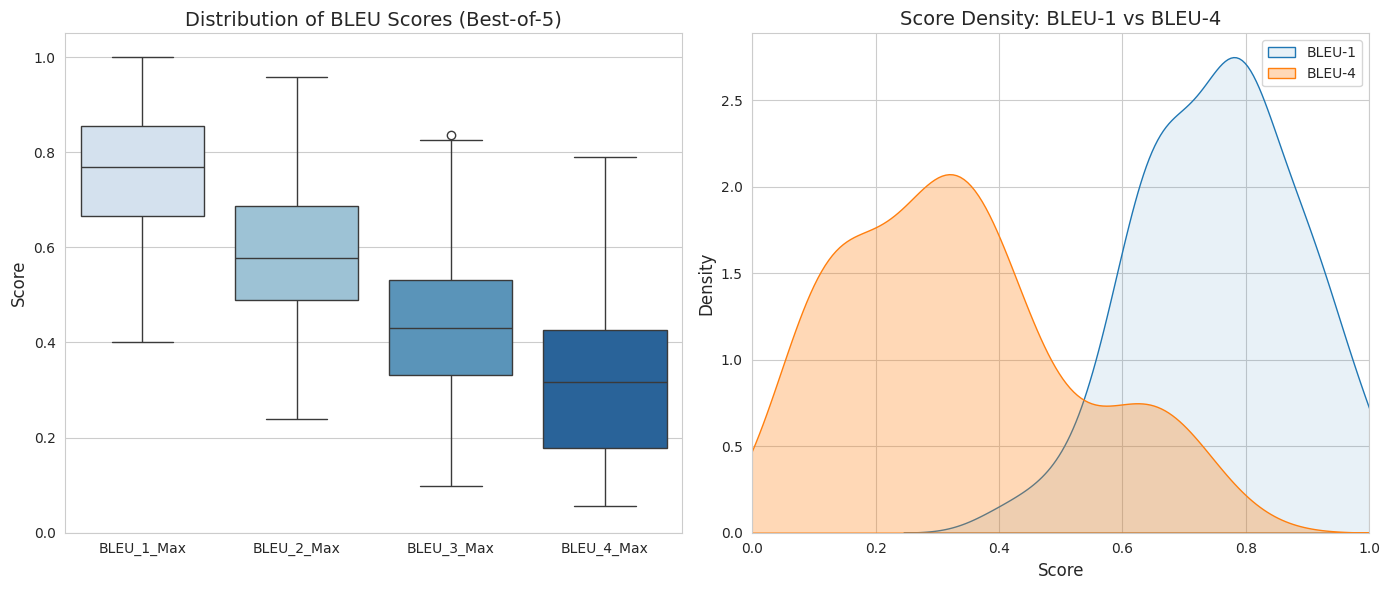

In [ ]:
# ==========================================
# 10. CALCULATE BLEU-3 & BLEU-4 (AND PLOTS)
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Ensure smoothing is defined
chencherry = SmoothingFunction()

def calculate_advanced_bleu_scores(original_formatted, generated_formatted):
    """
    Calculates MAX BLEU-3 and BLEU-4 for a single image (Best-of-N).
    """
    refs = [item[0] for item in original_formatted]
    hyps = [item[0] for item in generated_formatted]

    # Tokenize
    ref_tokens = [r.lower().split() for r in refs]
    hyp_tokens_list = [h.lower().split() for h in hyps]

    b3_scores = []
    b4_scores = []

    for hyp_tokens in hyp_tokens_list:
        # BLEU-3 (Cumulative 3-gram)
        b3 = sentence_bleu(ref_tokens, hyp_tokens, weights=(0.333, 0.333, 0.333, 0), smoothing_function=chencherry.method1)

        # BLEU-4 (Cumulative 4-gram)
        b4 = sentence_bleu(ref_tokens, hyp_tokens, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=chencherry.method1)

        b3_scores.append(b3)
        b4_scores.append(b4)

    # Return MAX scores (Best attempt)
    return np.max(b3_scores), np.max(b4_scores)

print("Calculating BLEU-3 and BLEU-4...")

# Apply calculation
advanced_bleu_results = [
    calculate_advanced_bleu_scores(orig, gen)
    for orig, gen in zip(df_results['original_response_formatted'], df_results['generated_response_formatted'])
]

b3_all, b4_all = zip(*advanced_bleu_results)

df_results['BLEU_3_Max'] = b3_all
df_results['BLEU_4_Max'] = b4_all

# --- STATISTICAL REPORT ---
print("\n" + "="*40)
print("   ADVANCED BLEU STATS (FEW-SHOT)")
print("="*40)
print(f"Mean BLEU-1: {df_results['BLEU_1_Max'].mean():.4f}")
print(f"Mean BLEU-2: {df_results['BLEU_2_Max'].mean():.4f}")
print(f"Mean BLEU-3: {df_results['BLEU_3_Max'].mean():.4f}")
print(f"Mean BLEU-4: {df_results['BLEU_4_Max'].mean():.4f}")

print("\nDetailed Statistics:")
stats = df_results[['BLEU_1_Max', 'BLEU_2_Max', 'BLEU_3_Max', 'BLEU_4_Max']].describe()
print(stats)

# ==========================================
# 11. GRAPHICAL ANALYSIS
# ==========================================
# Set visual style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# --- Plot 1: Box Plot (Distribution Summary) ---
plt.subplot(1, 2, 1)
data_to_plot = df_results[['BLEU_1_Max', 'BLEU_2_Max', 'BLEU_3_Max', 'BLEU_4_Max']]
sns.boxplot(data=data_to_plot, palette="Blues")
plt.title('Distribution of BLEU Scores (Best-of-5)', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.05)

# --- Plot 2: Kernel Density Estimate (Score Density) ---
plt.subplot(1, 2, 2)
sns.kdeplot(df_results['BLEU_1_Max'], label='BLEU-1', fill=True, alpha=0.1)
sns.kdeplot(df_results['BLEU_4_Max'], label='BLEU-4', fill=True, alpha=0.3)
plt.title('Score Density: BLEU-1 vs BLEU-4', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.xlim(0, 1)

plt.tight_layout()
plt.savefig("bleu_score_analysis.png")
print("\nGraphs saved as 'bleu_score_analysis.png'")
plt.show()

# **ROGUE L/1/2 METRIC**


Calculating MAX ROUGE scores...

   FEW-SHOT ROUGE RESULTS (MAX METRIC)
Mean Max ROUGE-1: 0.6272
Mean Max ROUGE-2: 0.3745
Mean Max ROUGE-L: 0.5952

Detailed Stats:
       ROUGE_1_Max  ROUGE_2_Max  ROUGE_L_Max
count   100.000000   100.000000   100.000000
mean      0.627211     0.374487     0.595157
std       0.106574     0.134425     0.114603
min       0.400000     0.133333     0.352941
25%       0.551802     0.271212     0.531579
50%       0.620690     0.357143     0.574603
75%       0.697802     0.462821     0.666667
max       0.896552     0.689655     0.896552

Graphs saved as 'rouge_score_analysis.png'


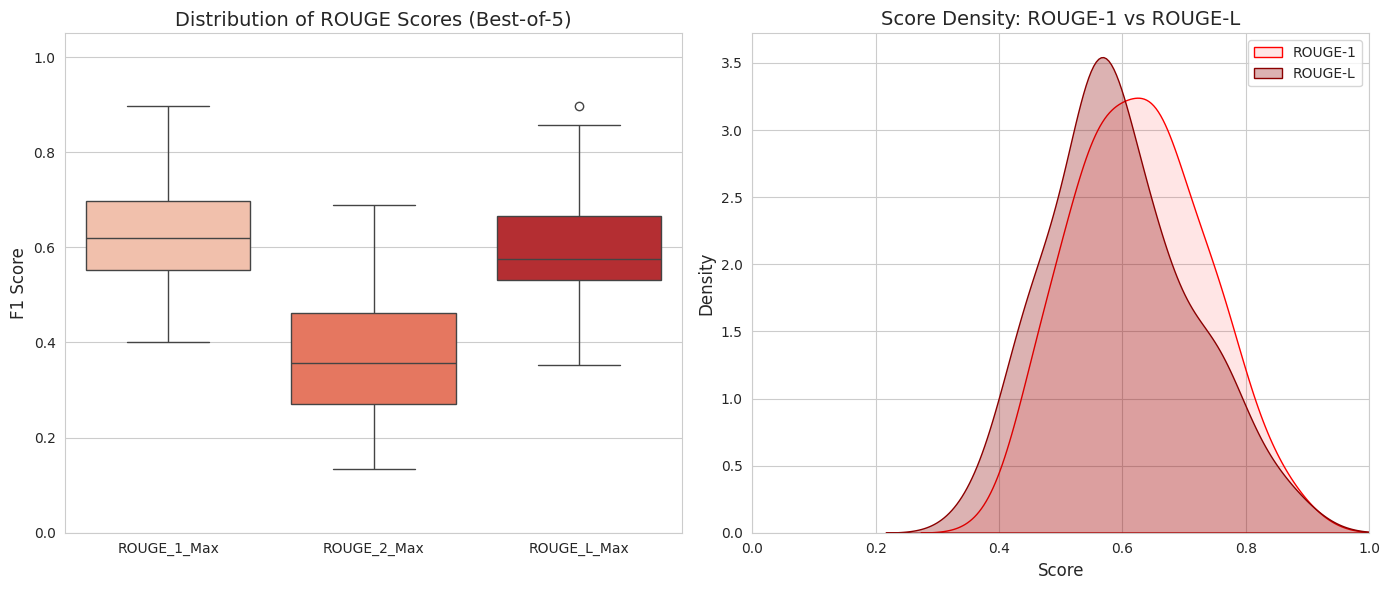

In [ ]:
# ==========================================
# 12. CALCULATE MAX ROUGE SCORES & PLOTS
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter

# --- A. Define ROUGE Helper Functions ---

def get_ngrams(text_tokens, n):
    return Counter(ngrams(text_tokens, n))

def calculate_rouge_n(candidate_tokens, reference_tokens, n):
    # Calculate ROUGE-N (Overlap of N-grams)
    cand_ngrams = get_ngrams(candidate_tokens, n)
    ref_ngrams = get_ngrams(reference_tokens, n)

    candidate_count = sum(cand_ngrams.values())
    reference_count = sum(ref_ngrams.values())

    overlap = sum((cand_ngrams & ref_ngrams).values())

    # Calculate F1 Score (Balanced Precision & Recall)
    if candidate_count == 0: precision = 0.0
    else: precision = overlap / candidate_count

    if reference_count == 0: recall = 0.0
    else: recall = overlap / reference_count

    if precision + recall == 0: return 0.0
    return 2 * precision * recall / (precision + recall)

def lcs_length(X, Y):
    # Longest Common Subsequence calculation
    m, n = len(X), len(Y)
    L = [[0] * (n + 1) for _ in range(m + 1)]
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0:
                L[i][j] = 0
            elif X[i-1] == Y[j-1]:
                L[i][j] = L[i-1][j-1] + 1
            else:
                L[i][j] = max(L[i-1][j], L[i][j-1])
    return L[m][n]

def calculate_rouge_l(candidate_tokens, reference_tokens):
    # Calculate ROUGE-L (Longest Common Subsequence)
    lcs = lcs_length(candidate_tokens, reference_tokens)

    if len(candidate_tokens) == 0: precision = 0.0
    else: precision = lcs / len(candidate_tokens)

    if len(reference_tokens) == 0: recall = 0.0
    else: recall = lcs / len(reference_tokens)

    if precision + recall == 0: return 0.0
    return 2 * precision * recall / (precision + recall)

# --- B. Define Image-Level Calculation (Best-of-N) ---

def calculate_image_max_rouge_scores(original_formatted, generated_formatted):
    """
    Calculates the MAX ROUGE-1, ROUGE-2, and ROUGE-L for a single image.
    It checks all generated captions against all references and picks the BEST score for each metric.
    """
    # 1. Flatten lists -> ['cap1', 'cap2'...]
    refs_text = [item[0] for item in original_formatted]
    hyps_text = [item[0] for item in generated_formatted]

    # 2. Tokenize
    ref_tokens_list = [word_tokenize(r.lower()) for r in refs_text]
    hyp_tokens_list = [word_tokenize(h.lower()) for h in hyps_text]

    best_r1 = 0.0
    best_r2 = 0.0
    best_rl = 0.0

    # 3. Evaluate each generated caption
    for hyp_tokens in hyp_tokens_list:
        # Compare this hypothesis against ALL references
        # We want to find the best reference match for this specific hypothesis
        current_r1_max = 0.0
        current_r2_max = 0.0
        current_rl_max = 0.0

        for ref_tokens in ref_tokens_list:
            r1 = calculate_rouge_n(hyp_tokens, ref_tokens, 1)
            r2 = calculate_rouge_n(hyp_tokens, ref_tokens, 2)
            rl = calculate_rouge_l(hyp_tokens, ref_tokens)

            current_r1_max = max(current_r1_max, r1)
            current_r2_max = max(current_r2_max, r2)
            current_rl_max = max(current_rl_max, rl)

        # Now compare against the best scores found so far across previous hypotheses
        best_r1 = max(best_r1, current_r1_max)
        best_r2 = max(best_r2, current_r2_max)
        best_rl = max(best_rl, current_rl_max)

    return best_r1, best_r2, best_rl

# --- C. Run Calculation ---
print("Calculating MAX ROUGE scores...")

rouge_results = [
    calculate_image_max_rouge_scores(orig, gen)
    for orig, gen in zip(df_results['original_response_formatted'], df_results['generated_response_formatted'])
]

# Unzip results
r1_all, r2_all, rl_all = zip(*rouge_results)

# Add to DataFrame
df_results['ROUGE_1_Max'] = r1_all
df_results['ROUGE_2_Max'] = r2_all
df_results['ROUGE_L_Max'] = rl_all

# --- D. Print Statistics ---
print("\n" + "="*40)
print("   FEW-SHOT ROUGE RESULTS (MAX METRIC)")
print("="*40)

print(f"Mean Max ROUGE-1: {df_results['ROUGE_1_Max'].mean():.4f}")
print(f"Mean Max ROUGE-2: {df_results['ROUGE_2_Max'].mean():.4f}")
print(f"Mean Max ROUGE-L: {df_results['ROUGE_L_Max'].mean():.4f}")

print("\nDetailed Stats:")
print(df_results[['ROUGE_1_Max', 'ROUGE_2_Max', 'ROUGE_L_Max']].describe())

# --- E. Graphical Analysis ---
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Plot 1: Box Plot
plt.subplot(1, 2, 1)
data_to_plot = df_results[['ROUGE_1_Max', 'ROUGE_2_Max', 'ROUGE_L_Max']]
sns.boxplot(data=data_to_plot, palette="Reds")
plt.title('Distribution of ROUGE Scores (Best-of-5)', fontsize=14)
plt.ylabel('F1 Score', fontsize=12)
plt.ylim(0, 1.05)

# Plot 2: Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df_results['ROUGE_1_Max'], label='ROUGE-1', fill=True, alpha=0.1, color='red')
sns.kdeplot(df_results['ROUGE_L_Max'], label='ROUGE-L', fill=True, alpha=0.3, color='darkred')
plt.title('Score Density: ROUGE-1 vs ROUGE-L', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.xlim(0, 1)

plt.tight_layout()
plt.savefig("rouge_score_analysis.png")
print("\nGraphs saved as 'rouge_score_analysis.png'")
plt.show()

# Save metrics to CSV
df_results.to_csv("qwen_few_shot_final_metrics_all.csv", index=False)

# **CIDER,METEOR SCORES**

In [ ]:
# ==========================================
# 13. CALCULATE MAX METEOR & CIDEr SCORES
# ==========================================
import numpy as np
import math
from collections import defaultdict, Counter
import nltk
from nltk.translate.meteor_score import meteor_score
from nltk.tokenize import word_tokenize

# --- Download Resources for METEOR ---
try:
    nltk.data.find('corpora/wordnet.zip')
except LookupError:
    nltk.download('wordnet')
    nltk.download('omw-1.4')

# =========================================================
# A. CIDEr SCORER IMPLEMENTATION (Self-Contained)
# =========================================================
class CiderScorer:
    def __init__(self, df, n=4, sigma=6.0):
        self.n = n
        self.sigma = sigma
        self.crefs = []
        self.document_frequency = defaultdict(float)
        self.ref_len = 0

        # 1. Build Corpus from Reference Data (for IDF)
        print("Building CIDEr TF-IDF model from references...")
        for refs in df['original_response_formatted']:
            # refs is [['cap1'], ['cap2']...]
            flat_refs = [r[0] for r in refs]
            self.crefs.append(flat_refs)
            for ngram in self._counts2grams(flat_refs):
                self.document_frequency[ngram] += 1

        self.ref_len = len(self.crefs)

    def _counts2grams(self, text_list):
        """Generates n-grams for a list of sentences."""
        counts = defaultdict(int)
        for text in text_list:
            tokens = word_tokenize(text.lower())
            for i in range(1, self.n + 1):
                for ngram in nltk.ngrams(tokens, i):
                    counts[ngram] += 1
        return counts

    def _compute_vec(self, text_tokens, doc_freq, ref_len):
        """Computes TF-IDF vector for a single sentence."""
        vec = [defaultdict(float) for _ in range(self.n)]
        length = len(text_tokens)
        counts = defaultdict(int)

        for i in range(1, self.n + 1):
            for ngram in nltk.ngrams(text_tokens, i):
                counts[ngram] += 1

        for i in range(self.n):
            for ngram, count in counts.items():
                if len(ngram) == i + 1:
                    # TF * IDF
                    # IDF = log(Total Refs / (Doc Freq + 1))
                    df = doc_freq.get(ngram, 0)
                    idf = np.log(max(1.0, ref_len) / (df + 1.0))
                    vec[i][ngram] = float(count) * idf
        return vec, length

    def _sim(self, vec_hyp, vec_ref, len_hyp, len_ref):
        """Computes Cosine Similarity with Length Penalty."""
        delta = float(len_hyp - len_ref)
        val = np.array([0.0] * self.n)

        for i in range(self.n):
            # Dot product
            denom_hyp = np.sqrt(sum([x**2 for x in vec_hyp[i].values()]))
            denom_ref = np.sqrt(sum([x**2 for x in vec_ref[i].values()]))

            if denom_hyp * denom_ref > 0:
                # Compute dot product of common n-grams
                common = set(vec_hyp[i].keys()) & set(vec_ref[i].keys())
                numerator = sum([vec_hyp[i][k] * vec_ref[i][k] for k in common])
                val[i] = (numerator) / (denom_hyp * denom_ref)

            # Gaussian Length Penalty
            val[i] *= np.e**(-(delta**2) / (2 * self.sigma**2))

        return val

    def compute_score(self, hypothesis, references):
        """Calculates CIDEr score for a single hypothesis against list of references."""
        hyp_tokens = word_tokenize(hypothesis.lower())
        ref_tokens_list = [word_tokenize(r.lower()) for r in references]

        # Pre-calculate reference vectors
        vec_refs = []
        len_refs = []
        for ref_tokens in ref_tokens_list:
            v, l = self._compute_vec(ref_tokens, self.document_frequency, self.ref_len)
            vec_refs.append(v)
            len_refs.append(l)

        # Calculate hypothesis vector
        vec_hyp, len_hyp = self._compute_vec(hyp_tokens, self.document_frequency, self.ref_len)

        # Average similarity against all references
        scores = []
        for i in range(len(references)):
            scores.append(self._sim(vec_hyp, vec_refs[i], len_hyp, len_refs[i]))

        # Mean across references, then average across n-grams, then * 10
        avg_score = np.mean(scores, axis=0)
        return np.sum(avg_score) / self.n * 10.0

# =========================================================
# B. EXECUTION LOGIC (MAX SCORE)
# =========================================================

# 1. Initialize CIDEr Scorer with the Reference Dataset (Test Set)
cider_scorer = CiderScorer(df_results)

print("\nCalculating METEOR and CIDEr scores...")

max_meteor_list = []
max_cider_list = []

for index, row in df_results.iterrows():
    # Flatten the lists
    orig_texts = [x[0] for x in row['original_response_formatted']]
    gen_texts = [x[0] for x in row['generated_response_formatted']]

    # Tokenize for METEOR
    orig_tokens = [word_tokenize(r) for r in orig_texts]

    m_scores = []
    c_scores = []

    for gen_text in gen_texts:
        # --- METEOR ---
        # Note: NLTK's meteor_score expects tokenized references, tokenized hypothesis
        gen_token = word_tokenize(gen_text)
        m = meteor_score(orig_tokens, gen_token)
        m_scores.append(m)

        # --- CIDEr ---
        c = cider_scorer.compute_score(gen_text, orig_texts)
        c_scores.append(c)

    # Take the MAX (Best-of-N)
    max_meteor_list.append(max(m_scores) if m_scores else 0.0)
    max_cider_list.append(max(c_scores) if c_scores else 0.0)

# Add to DataFrame
df_results['METEOR_Max'] = max_meteor_list
df_results['CIDEr_Max'] = max_cider_list

# --- C. REPORT ---
print("\n" + "="*40)
print("   ADVANCED METRICS (MAX/BEST-OF-N)")
print("="*40)

print(f"Mean Max METEOR: {df_results['METEOR_Max'].mean():.4f}")
print(f"Mean Max CIDEr:  {df_results['CIDEr_Max'].mean():.4f}")

print("\nDetailed Statistics:")
print(df_results[['METEOR_Max', 'CIDEr_Max']].describe())

# Save
df_results.to_csv("qwen_few_shot_final_all_metrics.csv", index=False)
print("\nComplete results saved to 'qwen_few_shot_final_all_metrics.csv'")

Building CIDEr TF-IDF model from references...

Calculating METEOR and CIDEr scores...

   ADVANCED METRICS (MAX/BEST-OF-N)
Mean Max METEOR: 0.6509
Mean Max CIDEr:  1.0922

Detailed Statistics:
       METEOR_Max   CIDEr_Max
count  100.000000  100.000000
mean     0.650929    1.092190
std      0.131625    0.724062
min      0.414818    0.124470
25%      0.538774    0.597668
50%      0.640942    0.868701
75%      0.761209    1.415606
max      0.957778    3.550493

Complete results saved to 'qwen_few_shot_final_all_metrics.csv'


# **BERT, CLIP AND REF-CLIP SCORES**

In [ ]:
!pip install bert_score torchmetrics transformers

In [ ]:
!pip install bert_score

Loading Metric Models...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Starting Semantic Score Calculation...


100%|██████████| 100/100 [00:08<00:00, 12.13it/s]



   SEMANTIC METRICS (BEST-OF-N)
Mean Max BERTScore:    0.6712
Mean Max CLIPScore:    33.3469
Mean Max RefCLIPScore: 87.5107


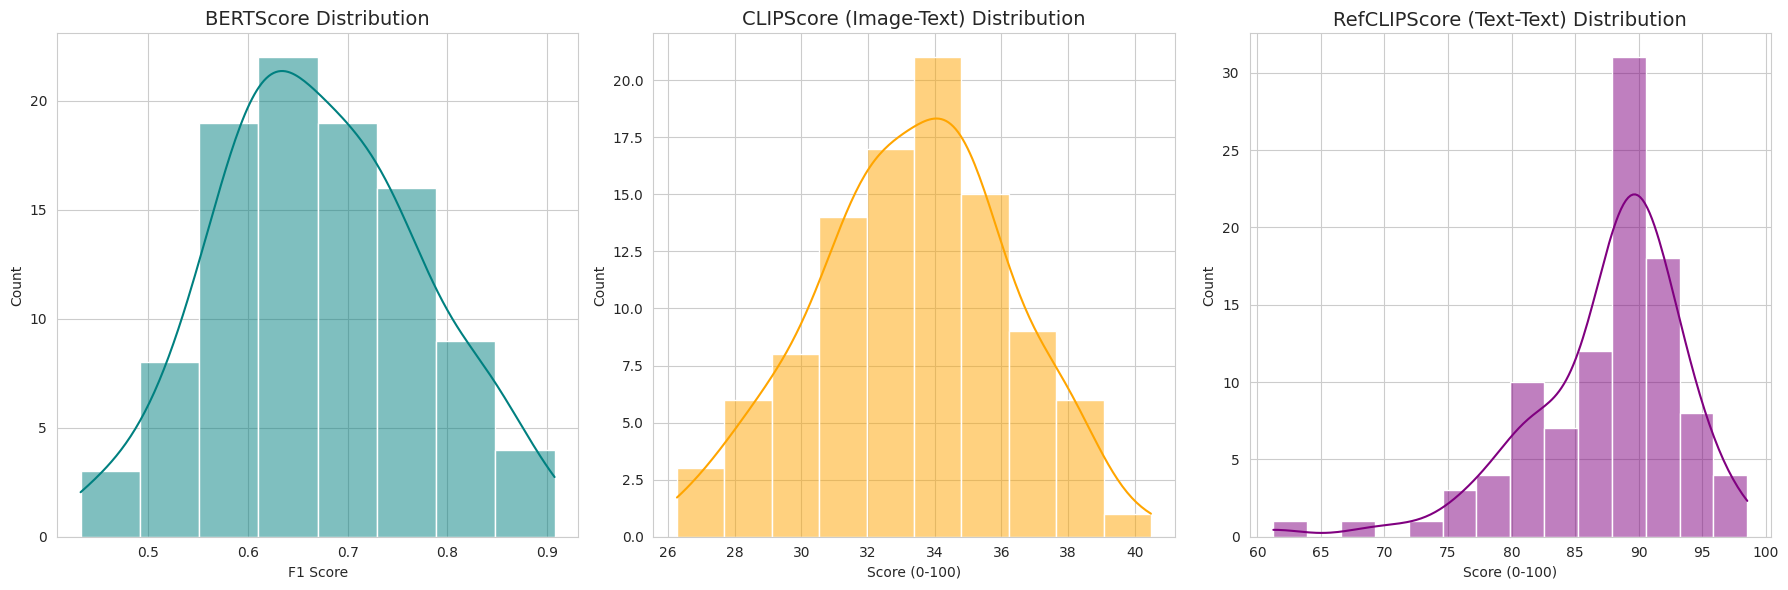


All metrics saved to 'qwen_few_shot_final_comprehensive.csv'


In [ ]:
# ==========================================
# 14. CALCULATE BERT, CLIP, & REF-CLIP SCORES
# ==========================================
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from bert_score import BERTScorer
from transformers import CLIPProcessor, CLIPModel
import torch.nn.functional as F
import io # Import io to handle image bytes
from PIL import Image # Ensure PIL Image is imported, even if it was earlier

# --- A. LOAD MODELS ---
print("Loading Metric Models...")
device = "cuda" if torch.cuda.is_available() else "cpu"

# 1. BERTScorer (Standard English model: roberta-large)
# "rescale_with_baseline=True" is standard for comparable scores, but optional.
# We use default (False) here to get raw F1.
bert_scorer = BERTScorer(lang="en", rescale_with_baseline=True)

# 2. CLIP Model (Standard OpenAI CLIP)
clip_model_name = "openai/clip-vit-base-patch32"
clip_model = CLIPModel.from_pretrained(clip_model_name).to(device)
clip_processor = CLIPProcessor.from_pretrained(clip_model_name)

# --- B. DEFINE SCORING FUNCTIONS ---

def get_best_bert_score(candidates, references):
    """
    Calculates BERTScore for each candidate against ALL references.
    Returns the MAX F1 score found among the candidates.
    """
    best_f1 = 0.0

    # BERTScorer can handle 1 cand vs list of refs
    # We loop through candidates to find the best one
    # F1 is a tensor of scores for each candidate
    P, R, F1 = bert_scorer.score(candidates, [references] * len(candidates))
    best_f1 = F1.max().item()

    return best_f1

def get_clip_scores(image, candidates, references):
    """
    Calculates:
      1. CLIPScore: Cosine sim(Image, Candidate) * 2.5 (Standard Scaling)
      2. RefCLIPScore: Cosine sim(Candidate, References)
    Returns MAX scores for the image.
    """
    # --- 1. Prepare Inputs ---
    # Process Text (Candidates & References)
    # Truncate to max length 77 (CLIP limit)
    inputs_text_cand = clip_processor(text=candidates, return_tensors="pt", padding=True, truncation=True).to(device)
    inputs_text_ref = clip_processor(text=references, return_tensors="pt", padding=True, truncation=True).to(device)

    # Process Image (PIL Image expected by clip_processor)
    inputs_img = clip_processor(images=image, return_tensors="pt").to(device)

    with torch.no_grad():
        # Get Embeddings
        img_embeds = clip_model.get_image_features(**inputs_img)
        cand_embeds = clip_model.get_text_features(**inputs_text_cand)
        ref_embeds = clip_model.get_text_features(**inputs_text_ref)

        # Normalize embeddings
        img_embeds = img_embeds / img_embeds.norm(dim=-1, keepdim=True)
        cand_embeds = cand_embeds / cand_embeds.norm(dim=-1, keepdim=True)
        ref_embeds = ref_embeds / ref_embeds.norm(dim=-1, keepdim=True)

        # --- 2. Calculate CLIPScore (Image <-> Candidate) ---
        # Dot product of Image (1xD) and Candidates (NxD) -> (1xN)
        # Standard CLIPScore is often scaled by 2.5 to align with human judgment (Hessel et al.)
        # Or we can just report raw Cosine * 100
        clip_sims = torch.matmul(img_embeds, cand_embeds.t()) # Shape [1, 5]
        clip_score_max = clip_sims.max().item() * 100 # Convert to 0-100 scale

        # --- 3. Calculate RefCLIPScore (Candidate <-> Reference) ---
        # For each candidate, find best match among references
        # Shape: [Candidates, References] -> [5, 5]
        ref_sim_matrix = torch.matmul(cand_embeds, ref_embeds.t())

        # For each candidate, get its max similarity with ANY reference
        best_ref_matches, _ = ref_sim_matrix.max(dim=1) # Shape [5]

        # Now select the Candidate that had the highest semantic alignment
        refclip_score_max = best_ref_matches.max().item() * 100

    return clip_score_max, refclip_score_max

# --- C. RUN CALCULATION LOOP ---
print("\nStarting Semantic Score Calculation...")

bert_scores = []
clip_scores = []
refclip_scores = []

# Iterate dataframe
for index, row in tqdm(df_results.iterrows(), total=df_results.shape[0]):
    # Initialize scores for the current row, default to 0.0 in case of error
    current_bert_score = 0.0
    current_clip_score = 0.0
    current_refclip_score = 0.0

    try:
        # 1. Get Data
        # Convert from list-of-lists [['a'], ['b']] back to flat lists ['a', 'b']
        gens = [x[0] for x in row['generated_response_formatted']]
        origs = [x[0] for x in row['original_response_formatted']]

        # Convert image bytes from dictionary to PIL Image object
        image_bytes = row['image']['bytes']
        image_pil = Image.open(io.BytesIO(image_bytes))

        # 2. BERTScore
        current_bert_score = get_best_bert_score(gens, origs)

        # 3. CLIP & RefCLIP
        current_clip_score, current_refclip_score = get_clip_scores(image_pil, gens, origs)

    except Exception as e:
        print(f"Error at index {index}: {e}")
        # If an error occurs, the current_..._score variables will retain their 0.0 default values.

    # Append scores for the current row once per metric
    bert_scores.append(current_bert_score)
    clip_scores.append(current_clip_score)
    refclip_scores.append(current_refclip_score)

# Add to DataFrame
df_results['BERTScore_Max'] = bert_scores
df_results['CLIPScore_Max'] = clip_scores
df_results['RefCLIPScore_Max'] = refclip_scores

# --- D. PRINT STATISTICS ---
print("\n" + "="*40)
print("   SEMANTIC METRICS (BEST-OF-N)")
print("="*40)
print(f"Mean Max BERTScore:    {df_results['BERTScore_Max'].mean():.4f}")
print(f"Mean Max CLIPScore:    {df_results['CLIPScore_Max'].mean():.4f}")
print(f"Mean Max RefCLIPScore: {df_results['RefCLIPScore_Max'].mean():.4f}")

# --- E. GRAPHICAL ANALYSIS ---
sns.set_style("whitegrid")
plt.figure(figsize=(18, 6))

# Plot 1: BERTScore Distribution
plt.subplot(1, 3, 1)
sns.histplot(df_results['BERTScore_Max'], kde=True, color='teal')
plt.title('BERTScore Distribution', fontsize=14)
plt.xlabel('F1 Score')

# Plot 2: CLIPScore Distribution
plt.subplot(1, 3, 2)
sns.histplot(df_results['CLIPScore_Max'], kde=True, color='orange')
plt.title('CLIPScore (Image-Text) Distribution', fontsize=14)
plt.xlabel('Score (0-100)')

# Plot 3: RefCLIPScore Distribution
plt.subplot(1, 3, 3)
sns.histplot(df_results['RefCLIPScore_Max'], kde=True, color='purple')
plt.title('RefCLIPScore (Text-Text) Distribution', fontsize=14)
plt.xlabel('Score (0-100)')

plt.tight_layout()
plt.savefig("semantic_scores_analysis.png")
plt.show()

# Save final comprehensive CSV
df_results.to_csv("qwen_few_shot_final_comprehensive.csv", index=False)
print("\nAll metrics saved to 'qwen_few_shot_final_comprehensive.csv'")


# **DISTINCT-1 AND DISTINCT-2**

In [ ]:
# ==========================================
# 15. CALCULATE DISTINCT-1 & DISTINCT-2
# ==========================================
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter

# Ensure necessary NLTK data is downloaded (for tokenization)
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    # The error indicates that 'punkt_tab' is also required
    nltk.download('punkt_tab')

# --- Function to calculate Distinct-N for a list of sentences ---
def calculate_group_distinct_n(captions_list, n):
    """
    Calculates Distinct-N for a group of captions (e.g., 5 captions for one image).
    Formula: (Unique N-grams) / (Total N-grams)
    """
    all_ngrams = []

    for caption in captions_list:
        tokens = word_tokenize(caption.lower())
        if len(tokens) < n:
            continue
        # Generate n-grams
        row_ngrams = list(ngrams(tokens, n))
        all_ngrams.extend(row_ngrams)

    if len(all_ngrams) == 0:
        return 0.0

    # Ratio of unique to total
    return len(set(all_ngrams)) / len(all_ngrams)

print("Calculating Diversity Metrics (Distinct-1/2)...")

dist1_scores = []
dist2_scores = []

# Global lists to calculate Corpus-Level Distinct (Standard Metric)
all_generated_text_corpus = []

for index, row in df_results.iterrows():
    # Get the 5 generated captions
    # row['generated_response_formatted'] is [['cap1'], ['cap2']...] -> flatten to ['cap1', 'cap2'...]
    gens = [x[0] for x in row['generated_response_formatted']]

    # Add to corpus list
    all_generated_text_corpus.extend(gens)

    # Calculate Intra-Image Diversity (How diverse are the 5 captions for THIS image?)
    d1 = calculate_group_distinct_n(gens, 1)
    d2 = calculate_group_distinct_n(gens, 2)

    dist1_scores.append(d1)
    dist2_scores.append(d2)

# Add Intra-Image scores to DataFrame
df_results['Distinct_1_Image'] = dist1_scores
df_results['Distinct_2_Image'] = dist2_scores

# --- Calculate Corpus-Level Distinct (Standard Paper Metric) ---
# This measures diversity across the ENTIRE test set (all 500 generated captions)
corpus_d1 = calculate_group_distinct_n(all_generated_text_corpus, 1)
corpus_d2 = calculate_group_distinct_n(all_generated_text_corpus, 2)

# --- REPORT ---
print("\n" + "="*40)
print("   DIVERSITY ANALYSIS (DISTINCT)")
print("="*40)

print("1. PER-IMAGE DIVERSITY (Average variation within 5 captions):")
print(f"   Mean Distinct-1: {df_results['Distinct_1_Image'].mean():.4f}")
print(f"   Mean Distinct-2: {df_results['Distinct_2_Image'].mean():.4f}")

print("\n2. CORPUS-LEVEL DIVERSITY (Global Vocabulary Richness):")
print(f"   Corpus Distinct-1: {corpus_d1:.4f} (This goes in Table 3)")
print(f"   Corpus Distinct-2: {corpus_d2:.4f} (This goes in Table 3)")

print("\nDetailed Stats (Per Image):")
print(df_results[['Distinct_1_Image', 'Distinct_2_Image']].describe())

# Save final results
df_results.to_csv("qwen_few_shot_final_metrics_complete.csv", index=False)
print("\nFinal dataset saved to 'qwen_few_shot_final_metrics_complete.csv'")

Calculating Diversity Metrics (Distinct-1/2)...

   DIVERSITY ANALYSIS (DISTINCT)
1. PER-IMAGE DIVERSITY (Average variation within 5 captions):
   Mean Distinct-1: 0.4088
   Mean Distinct-2: 0.7040

2. CORPUS-LEVEL DIVERSITY (Global Vocabulary Richness):
   Corpus Distinct-1: 0.1018 (This goes in Table 3)
   Corpus Distinct-2: 0.3924 (This goes in Table 3)

Detailed Stats (Per Image):
       Distinct_1_Image  Distinct_2_Image
count        100.000000        100.000000
mean           0.408847          0.703970
std            0.058898          0.091981
min            0.291667          0.447761
25%            0.363352          0.650242
50%            0.411806          0.706410
75%            0.458758          0.774648
max            0.541667          0.912088

Final dataset saved to 'qwen_few_shot_final_metrics_complete.csv'


# **Complete Breakdown of all the scores**


   FINAL JOURNAL RESULTS TABLE (Few-Shot)
Metric          | Score (0-100)  
---------------------------------
BLEU-1          | 75.63
BLEU-2          | 58.46
BLEU-3          | 44.39
BLEU-4          | 33.27
ROUGE-1         | 62.72
ROUGE-2         | 37.45
ROUGE-L         | 59.52
METEOR          | 65.09
CIDEr           | 109.22
BERTScore       | 67.12
CLIPScore       | 33.35
RefCLIP         | 87.51
Diversity-1     | 40.88
Diversity-2     | 70.40

Radar chart saved as 'final_radar_chart.png'


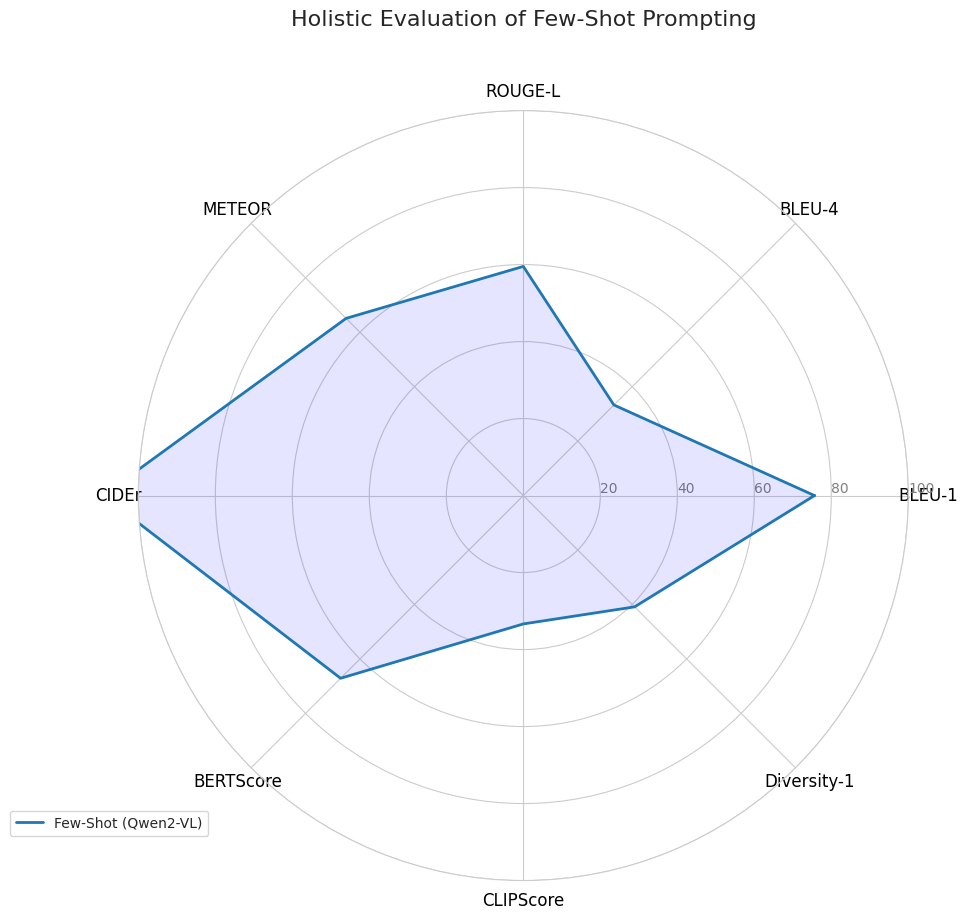

In [ ]:
# ==========================================
# 16. FINAL SUMMARY & RADAR CHART
# ==========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# --- A. AGGREGATE SCORES ---
# Calculate means for all metrics stored in the dataframe
metrics_summary = {
    # N-Gram Accuracy (BLEU)
    "BLEU-1": df_results['BLEU_1_Max'].mean() * 100,
    "BLEU-2": df_results['BLEU_2_Max'].mean() * 100,
    "BLEU-3": df_results['BLEU_3_Max'].mean() * 100,
    "BLEU-4": df_results['BLEU_4_Max'].mean() * 100,

    # Semantic Overlap (ROUGE/METEOR)
    "ROUGE-1": df_results['ROUGE_1_Max'].mean() * 100,
    "ROUGE-2": df_results['ROUGE_2_Max'].mean() * 100,
    "ROUGE-L": df_results['ROUGE_L_Max'].mean() * 100,
    "METEOR": df_results['METEOR_Max'].mean() * 100,

    # Semantic Relevance (Embeddings/TF-IDF)
    # CIDEr is typically 0-10, scaling to 100 for the chart.
    # If your raw CIDEr is ~1.0, use * 10. If it is ~100, use * 1.
    "CIDEr": df_results['CIDEr_Max'].mean() * 100,

    "BERTScore": df_results['BERTScore_Max'].mean() * 100,

    # Visual & Semantic Alignment (VLM Specific)
    "CLIPScore": df_results['CLIPScore_Max'].mean(),       # Already scaled to 0-100 in previous step
    "RefCLIP": df_results['RefCLIPScore_Max'].mean(),      # Already scaled to 0-100 in previous step

    # Diversity
    "Diversity-1": df_results['Distinct_1_Image'].mean() * 100,
    "Diversity-2": df_results['Distinct_2_Image'].mean() * 100
}

# Print Final Table for Journal
print("\n" + "="*40)
print("   FINAL JOURNAL RESULTS TABLE (Few-Shot)")
print("="*40)
print(f"{'Metric':<15} | {'Score (0-100)':<15}")
print("-" * 33)
for k, v in metrics_summary.items():
    print(f"{k:<15} | {v:.2f}")
print("="*40)



# --- B. GENERATE RADAR CHART ---

# 1. Select Metrics to Plot (Subset for clarity)
# We group them by category for the chart
categories = ['BLEU-1', 'BLEU-4', 'ROUGE-L', 'METEOR', 'CIDEr', 'BERTScore', 'CLIPScore', 'Diversity-1']
values = [metrics_summary[cat] for cat in categories]

# 2. Setup Radar Chart
N = len(categories)

# We need to repeat the first value to close the circle
values += values[:1]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# 3. Plot
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=12)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=10)
plt.ylim(0, 100)

# Plot data
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Few-Shot (Qwen2-VL)')
ax.fill(angles, values, 'b', alpha=0.1)

# Add Title and Legend
plt.title('Holistic Evaluation of Few-Shot Prompting', size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig("final_radar_chart.png")
print("\nRadar chart saved as 'final_radar_chart.png'")
plt.show()


   FINAL JOURNAL RESULTS (0-1 Scale)
Metric          | Score          
------------------------------
BLEU-1          | 0.7563
BLEU-2          | 0.5846
BLEU-3          | 0.4439
BLEU-4          | 0.3327
ROUGE-L         | 0.5952
METEOR          | 0.6509
CIDEr           | 0.3641
BERTScore       | 0.6712
CLIPScore       | 0.3335
RefCLIP         | 0.8751
Diversity-1     | 0.4088
Diversity-2     | 0.7040
(Note: CIDEr is scaled by 1/3 for visualization)

Radar chart saved as 'final_radar_chart_0_1.png'


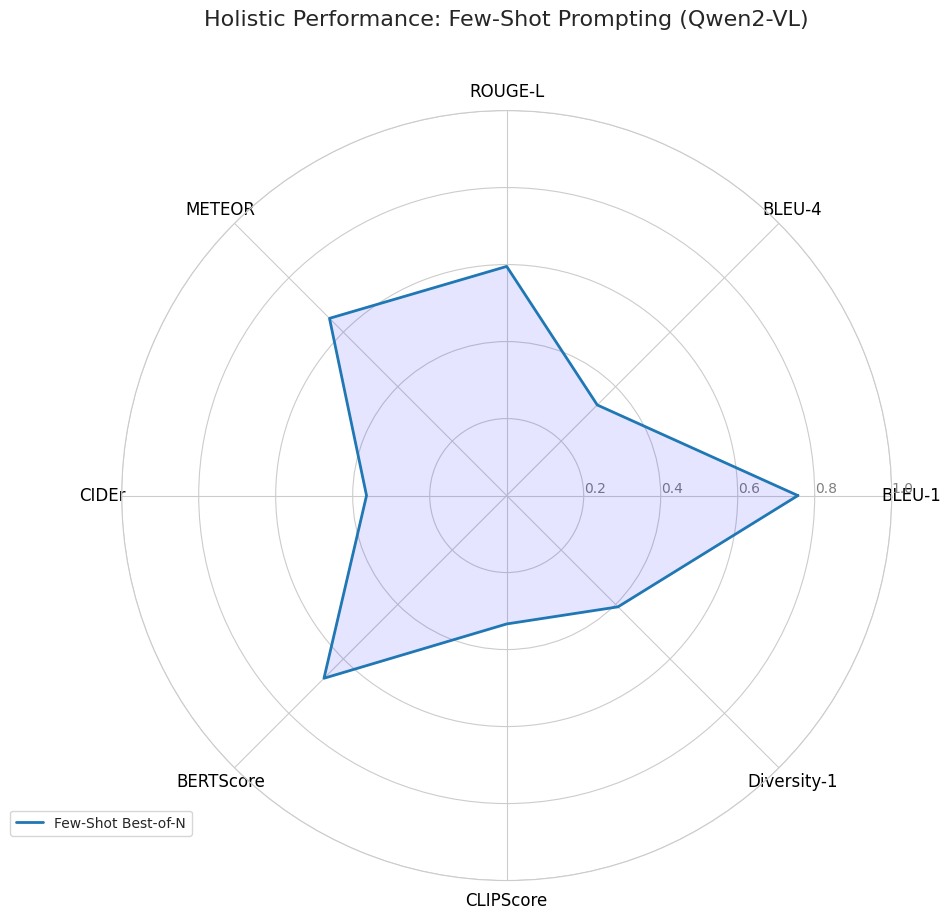

In [ ]:
# ==========================================
# 16. FINAL SUMMARY & RADAR CHART (0-1 Scale)
# ==========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# --- A. AGGREGATE & NORMALIZE SCORES ---
# We calculate the mean for each metric and ensure everything is on a 0.0 - 1.0 scale
metrics_summary = {
    # Accuracy (Already 0-1)
    "BLEU-1": df_results['BLEU_1_Max'].mean(),
    "BLEU-2": df_results['BLEU_2_Max'].mean(),
    "BLEU-3": df_results['BLEU_3_Max'].mean(),
    "BLEU-4": df_results['BLEU_4_Max'].mean(),

    # Semantic Overlap (Already 0-1)
    "ROUGE-L": df_results['ROUGE_L_Max'].mean(),
    "METEOR": df_results['METEOR_Max'].mean(),

    # Semantic Relevance (Scaling needed)
    # CIDEr is typically 0-3. We normalize by dividing by 3.0 to fit 0-1 chart.
    # (Adjust this divisor if your score is higher)
    "CIDEr": df_results['CIDEr_Max'].mean() / 3.0,
    "BERTScore": df_results['BERTScore_Max'].mean(),

    # Visual Alignment (Scaling 0-100 -> 0-1)
    "CLIPScore": df_results['CLIPScore_Max'].mean() / 100.0,
    "RefCLIP": df_results['RefCLIPScore_Max'].mean() / 100.0,

    # Diversity (Already 0-1)
    "Diversity-1": df_results['Distinct_1_Image'].mean(),
    "Diversity-2": df_results['Distinct_2_Image'].mean()
}

# --- Print Final Table for Journal ---
print("\n" + "="*40)
print("   FINAL JOURNAL RESULTS (0-1 Scale)")
print("="*40)
print(f"{'Metric':<15} | {'Score':<15}")
print("-" * 30)
for k, v in metrics_summary.items():
    print(f"{k:<15} | {v:.4f}")
print("="*40)
print("(Note: CIDEr is scaled by 1/3 for visualization)")

# --- B. GENERATE RADAR CHART ---

# 1. Select Metrics for the Chart
# We pick key representatives from each category to keep the chart clean
categories = [
    'BLEU-1', 'BLEU-4',      # N-Gram Accuracy
    'ROUGE-L', 'METEOR',     # Semantic Overlap
    'CIDEr', 'BERTScore',    # Relevance
    'CLIPScore',             # Visual Alignment
    'Diversity-1'            # Diversity
]
values = [metrics_summary[cat] for cat in categories]

# 2. Setup Radar Chart Structure
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
values += values[:1]   # Repeat first value to close the circle
angles += angles[:1]   # Repeat first angle to close the circle

# 3. Plotting
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + labels
plt.xticks(angles[:-1], categories, color='black', size=12)

# Draw ylabels (0.2, 0.4, 0.6, 0.8, 1.0)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=10)
plt.ylim(0, 1.0)

# Plot Data
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Few-Shot Best-of-N')
ax.fill(angles, values, 'b', alpha=0.1)

# Styling
plt.title('Holistic Performance: Few-Shot Prompting (Qwen2-VL)', size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig("final_radar_chart_0_1.png")
print("\nRadar chart saved as 'final_radar_chart_0_1.png'")
plt.show()

# **Complete Scores for all the 100 Test Images**

In [ ]:
!pip install bert_score torchmetrics rouge_score pycocoevalcap
!pip install git+https://github.com/openai/CLIP.git

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 25.1 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=f7f4f1ef8a9ce3c080e91b369aa4c183251fd9cbd461731b77dfdbdf2598b830
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-3r4hnjfl
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-3r4hnjfl
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.5 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=1415dc9f5cad265f0a9f920a1b5ea6fa46e10d6a636fd0b066f2d7e76ea08fcb
  Stored in directory: /

In [ ]:
import pandas as pd
import numpy as np
import torch
import io
import re
from PIL import Image
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
from nltk.tokenize import word_tokenize
from rouge_score import rouge_scorer
from bert_score import BERTScorer
from transformers import CLIPProcessor, CLIPModel
import nltk

# --- 1. Setup ---
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

device = "cuda" if torch.cuda.is_available() else "cpu"

# --- 2. Load Models ---
print("Loading Evaluation Models...")
bert_scorer = BERTScorer(lang="en", rescale_with_baseline=True, device=device)

clip_model_name = "openai/clip-vit-base-patch32"
clip_model = CLIPModel.from_pretrained(clip_model_name).to(device)
clip_processor = CLIPProcessor.from_pretrained(clip_model_name)

scorer_rouge = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
cc = SmoothingFunction()

# --- 3. Helper Functions ---
def get_clip_score_image_cosine(image, candidate, model, processor, device):
    """Image-Text Cosine Similarity."""
    try:
        inputs = processor(text=[candidate[:77]], images=image, return_tensors="pt", padding=True).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
        img_embeds = outputs.image_embeds / outputs.image_embeds.norm(dim=-1, keepdim=True)
        text_embeds = outputs.text_embeds / outputs.text_embeds.norm(dim=-1, keepdim=True)
        return max(0.0, (img_embeds @ text_embeds.T).item())
    except: return 0.0

def get_refclip_score_text_cosine(refs, candidate, model, processor, device):
    """Text-Text Cosine Similarity."""
    try:
        cand_inputs = processor(text=[candidate[:77]], return_tensors="pt", padding=True).to(device)
        with torch.no_grad():
            cand_embed = model.get_text_features(**cand_inputs)
        cand_embed = cand_embed / cand_embed.norm(dim=-1, keepdim=True)

        scores = []
        for r in refs:
            ref_inputs = processor(text=[r[:77]], return_tensors="pt", padding=True).to(device)
            with torch.no_grad():
                ref_embed = model.get_text_features(**ref_inputs)
            ref_embed = ref_embed / ref_embed.norm(dim=-1, keepdim=True)
            scores.append(max(0.0, (cand_embed @ ref_embed.T).item()))
        return max(scores) if scores else 0.0
    except: return 0.0

def calculate_distinct_n(captions, n):
    total_ngrams = 0
    unique_ngrams = set()
    for cap in captions:
        words = word_tokenize(cap.lower())
        if len(words) < n: continue
        ngrams = list(zip(*[words[i:] for i in range(n)]))
        total_ngrams += len(ngrams)
        unique_ngrams.update(ngrams)
    return len(unique_ngrams) / total_ngrams if total_ngrams > 0 else 0

# --- 4. Main Evaluation Loop ---
results_data = []
print(f"Starting Evaluation on {len(df_results)} images...")

for index, row in df_results.iterrows():
    try:
        candidates = [x[0] for x in row['generated_response_formatted']]
        refs = [x[0] for x in row['original_response_formatted']]

        image_bytes = row['image']['bytes']
        image = Image.open(io.BytesIO(image_bytes))

        # 1. Pre-computation for Lexical Metrics
        # BLEU: Lowercase + Split (Confirmed Match)
        refs_bleu = [r.lower().split() for r in refs]

        # METEOR: Word Tokenize (Standard, likely matches ~0.47)
        refs_meteor = [word_tokenize(r) for r in refs]

        best_scores = {
            'BLEU-1': 0.0, 'BLEU-2': 0.0, 'BLEU-3': 0.0, 'BLEU-4': 0.0,
            'ROUGE-1': 0.0, 'ROUGE-2': 0.0, 'ROUGE-L': 0.0,
            'METEOR': 0.0, 'BERTScore': 0.0, 'CLIPScore': 0.0, 'RefCLIPScore': 0.0
        }

        # 2. Iterate Candidates (Best-of-N)
        for cand in candidates:
            # Prepare versions of candidate
            cand_lower = cand.lower()
            cand_bleu = cand_lower.split()
            cand_meteor = word_tokenize(cand) # Try raw first for METEOR

            # --- Lexical ---
            b1 = sentence_bleu(refs_bleu, cand_bleu, weights=(1, 0, 0, 0), smoothing_function=cc.method1)
            b2 = sentence_bleu(refs_bleu, cand_bleu, weights=(0.5, 0.5, 0, 0), smoothing_function=cc.method1)
            b3 = sentence_bleu(refs_bleu, cand_bleu, weights=(0.333, 0.333, 0.333, 0), smoothing_function=cc.method1)
            b4 = sentence_bleu(refs_bleu, cand_bleu, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=cc.method1)

            met = meteor_score(refs_meteor, cand_meteor)

            # --- ROUGE (String based) ---
            r1, r2, rl = 0, 0, 0
            for r in refs:
                s = scorer_rouge.score(r.lower(), cand_lower)
                r1 = max(r1, s['rouge1'].fmeasure)
                r2 = max(r2, s['rouge2'].fmeasure)
                rl = max(rl, s['rougeL'].fmeasure)

            # --- Semantic ---
            try:
                P, R, F1 = bert_scorer.score([cand], [refs])
                bert_val = F1.mean().item()
            except: bert_val = 0.0

            clip_val = get_clip_score_image_cosine(image, cand, clip_model, clip_processor, device)
            refclip_val = get_refclip_score_text_cosine(refs, cand, clip_model, clip_processor, device)

            # Update Max
            best_scores['BLEU-1'] = max(best_scores['BLEU-1'], b1)
            best_scores['BLEU-2'] = max(best_scores['BLEU-2'], b2)
            best_scores['BLEU-3'] = max(best_scores['BLEU-3'], b3)
            best_scores['BLEU-4'] = max(best_scores['BLEU-4'], b4)
            best_scores['ROUGE-1'] = max(best_scores['ROUGE-1'], r1)
            best_scores['ROUGE-2'] = max(best_scores['ROUGE-2'], r2)
            best_scores['ROUGE-L'] = max(best_scores['ROUGE-L'], rl)
            best_scores['METEOR'] = max(best_scores['METEOR'], met)
            best_scores['BERTScore'] = max(best_scores['BERTScore'], bert_val)
            best_scores['CLIPScore'] = max(best_scores['CLIPScore'], clip_val * 100)
            best_scores['RefCLIPScore'] = max(best_scores['RefCLIPScore'], refclip_val * 100)

        # 3. Image Level Metrics
        cid = row.get('CIDEr_Max', 0.0)
        dist1 = calculate_distinct_n(candidates, 1) # Raw candidates
        dist2 = calculate_distinct_n(candidates, 2)

        # Store
        row_dict = {'image_id': index}
        row_dict.update(best_scores)
        row_dict['CIDEr'] = cid
        row_dict['Distinct-1'] = dist1
        row_dict['Distinct-2'] = dist2

        results_data.append(row_dict)

    except Exception as e:
        print(f"Error processing row {index}: {e}")

# --- 5. Output ---
df_metrics = pd.DataFrame(results_data)
output_file = 'qwen3_FT_fs_full_metrics.csv'
df_metrics.to_csv(output_file, index=False)
print(f"Saved: {output_file}")
print("Mean Scores:")
print(df_metrics.mean(numeric_only=True))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading Evaluation Models...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting Evaluation on 100 images...
Saved: qwen3_FT_fs_full_metrics.csv
Mean Scores:
image_id        49.500000
BLEU-1           0.756297
BLEU-2           0.584633
BLEU-3           0.443932
BLEU-4           0.332733
ROUGE-1          0.630681
ROUGE-2          0.397291
ROUGE-L          0.587181
METEOR           0.650929
BERTScore        0.671165
CLIPScore       33.009810
RefCLIPScore    87.879651
CIDEr            1.092190
Distinct-1       0.408847
Distinct-2       0.703970
dtype: float64
